In [222]:
import os

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import PIL 
from PIL import Image

import cv2

In [496]:
project_path = os.getcwd()
image_path = r'F:\Codenrock\Kryptonite\data\train\images'
#project_path

In [226]:
coords_df = pd.read_csv('points_df')
coords_df

folder  image  left_eye_x  left_eye_y  right_eye_x  right_eye_y  \
0           0  0.jpg   70.293776   90.674323   151.365816    94.889114   
1           0  1.jpg   69.580295   90.073405   156.717269   100.265060   
2           0  2.jpg   82.465339  104.280702   142.471063   104.811607   
3           0  3.jpg   80.448859  102.413674   140.424275   104.375992   
4           0  4.jpg   71.584100   91.523647   151.622520    95.589734   
...       ...    ...         ...         ...          ...          ...   
97728    9999  4.jpg   83.923056  105.820967   138.782989   108.440058   
97729    9999  5.jpg   74.329556   90.746301   154.508275    94.955056   
97730    9999  6.jpg   83.271810  104.747291   138.957000   105.482776   
97731    9999  7.jpg   71.405141   93.835775   153.594045    92.857850   
97732    9999  8.jpg   85.336076  105.590511   139.711469   106.661673   

           nose_x      nose_y  left_mouth_x  left_mouth_y  right_mouth_x  \
0      117.071802  131.807275     74.369801    157.591915     146.275379   
1      129.728629  124.721979     76.691813    157.875909     140.767685   
2      114.939235  136.771507     85.158050    159.949795     136.963997   
3       99.766897  126.291629     80.780504    162.513932     129.175480   
4      121.725819  131.650176     73.129187    152.414759     145.182651   
...           ...         ...           ...           ...            ...   
97728  117.127845  125.220872     92.171281    163.416848     132.105251   
97729  113.437548  124.841995     76.014400    163.639840     147.937645   
97730  109.451029  135.194591     87.223640    164.572893     132.917841   
97731  115.630346  137.028752     73.463271    152.329632     155.821337   
97732  112.158965  129.647635     89.865321    161.888459     132.032189   

       right_mouth_y  
0         160.924941  
1         165.875864  
2         160.577387  
3         164.378685  
4         155.334909  
...              ...  
97728     165.387115  
97729     166.875557  
97730     165.264867  
97731     150.818192  
97732     162.913251  

[97733 rows x 12 columns]

In [228]:
def show_points(path, folder, name, df):
    img = Image.open(os.path.join(path, folder, name))
    coord = np.array(df.loc[(df['folder'] == int(folder)) & (df['image'] == name)])[0][2::]
    plt.figure(figsize = (6, 6))
    plt.imshow(img)
    plt.scatter(coord[::2], coord[1::2], s = 50, marker ='.', c='w')
    plt.axis('off');

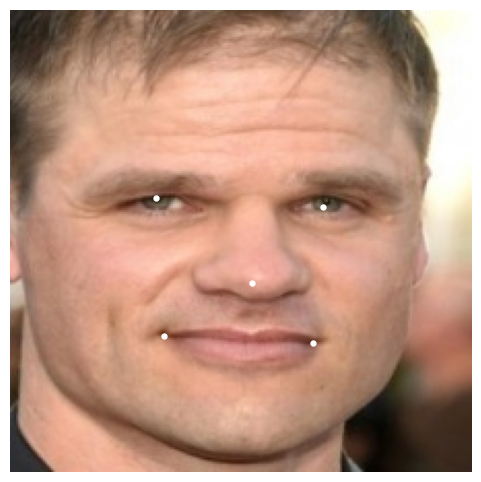

In [230]:
show_points(project_path, '000000', '0.jpg', coords_df)

In [512]:
def crop_face(path, folder, name, df, output_path, show = False):
    img = Image.open(os.path.join(path, folder, name))
    coord = np.array(df.loc[(df['folder'] == int(folder)) & (df['image'] == name)])[0][2::]
    plt.figure(figsize = (6, 6))
    
    x = coord[0] - (coord[2] - coord[0]) / 1.7
    y = coord[1] - (coord[5] - coord[1]) * 1.7
    width = ((coord[2] - coord[0]) / 1.7 + coord[2]) - x
    height = (coord[7] - coord[5]) * 1.7 + coord[7] - y # you may change the height

    if x < 0:
        left = 0
    else:
        left = x

    if y < 0:
        up = 0
    else:
        up = y
 
    if x + width > 224:
        right = 224
    else:
        right = x + width
        
    if y + height > 224:
        bottom = 224
    else:
        bottom = y + height
        
    cropped = img.crop((left, up, right, bottom))

    cropped.save(os.path.join(output_path, name))
    coords_new = [coord[0] - x, coord[1] - y, coord[2] - x, coord[3] - y, coord[4] - x, coord[5] - y, coord[6] - x, coord[7] - y, coord[8] - x, coord[9] - y]

    if show == True:
        plt.imshow(cropped)
        plt.axis('off');

    return coords_new

In [545]:
def crop_resize_face(path, folder, name, df, output_path, show = False):
    img = Image.open(os.path.join(path, folder, name))
    coord = np.array(df.loc[(df['folder'] == int(folder)) & (df['image'] == name)])[0][2::]
    plt.figure(figsize = (6, 6))
    
    x = coord[0] - (coord[2] - coord[0]) / 1.7
    y = coord[1] - (coord[5] - coord[1]) * 1.7
    width = ((coord[2] - coord[0]) / 1.7 + coord[2]) - x
    height = (coord[7] - coord[5]) * 1.7 + coord[7] - y # you may change the height

    if x < 0:
        left = 0
    else:
        left = x

    if y < 0:
        up = 0
    else:
        up = y
 
    if x + width > 224:
        right = 224
    else:
        right = x + width
        
    if y + height > 224:
        bottom = 224
    else:
        bottom = y + height
        
    cropped = img.crop((left, up, right, bottom))

    img_w = right - left
    img_h = bottom - up
    
    mltplr_w = 224 / img_w # коэффициент ширины
    mltplr_h = 224 / img_h # коэффициент высоты

    x_coord = [(c - x) * mltplr_w for c in coord[0::2]]
    y_coord = [(c - y) * mltplr_h for c in coord[1::2]]

    resize = cropped.resize((224, 224))

    resize.save(os.path.join(output_path, name))
    coords_new = [x_coord[0], y_coord[0], x_coord[1], y_coord[1], x_coord[2], y_coord[2], x_coord[3], y_coord[3], x_coord[4], y_coord[4]]

    if show == True:
        plt.imshow(cropped)
        plt.axis('off');

    return coords_new

##### Check

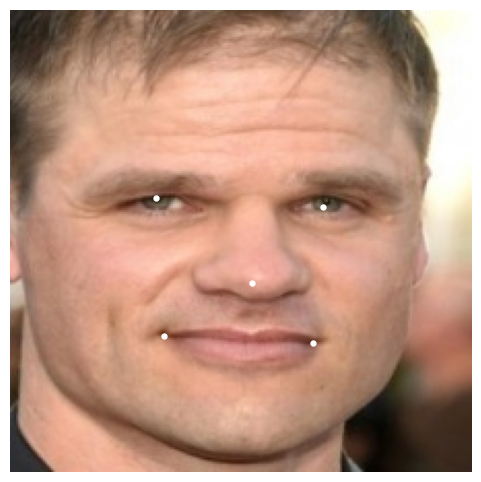

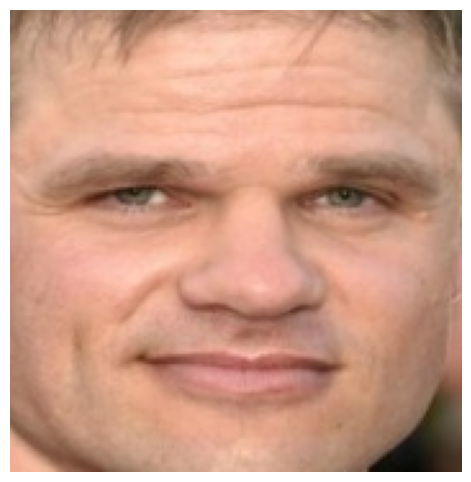

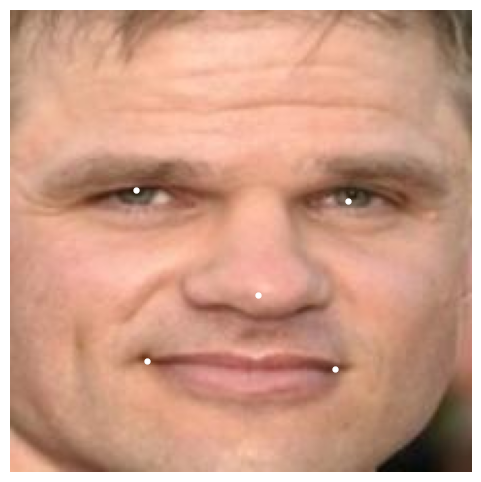

In [549]:
show_points(image_path, '000000', '0.jpg', coords_df)
coords = crop_resize_face(image_path, '000000', '0.jpg', coords_df, project_path, show = True)

img = Image.open(os.path.join(project_path, '0.jpg'))
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords[::2], coords[1::2], s = 50, marker ='.', c='w')
plt.axis('off');

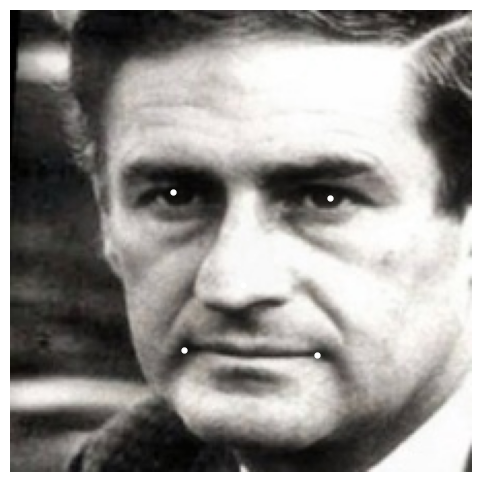

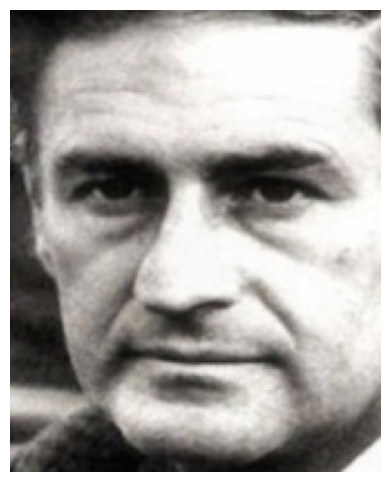

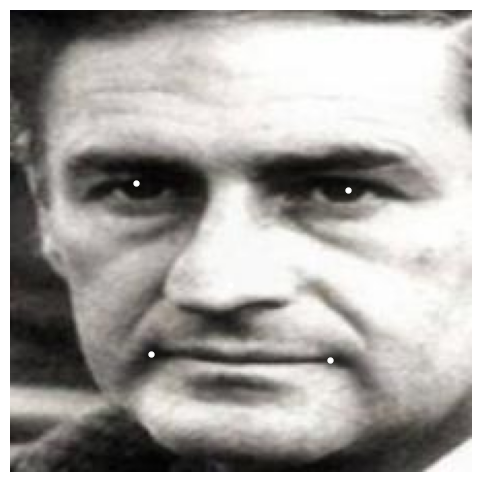

In [551]:
show_points(image_path, '000001', '0.jpg', coords_df)
coords = crop_resize_face(image_path, '000001', '0.jpg', coords_df, project_path, show = True)

img = Image.open(os.path.join(project_path, '0.jpg'))
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords[::2], coords[1::2], s = 50, marker ='.', c='w')
plt.axis('off');

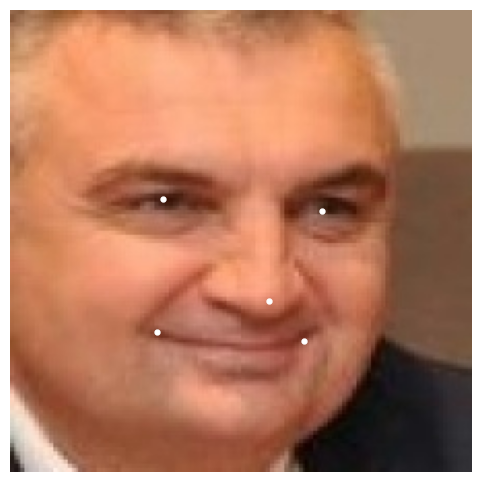

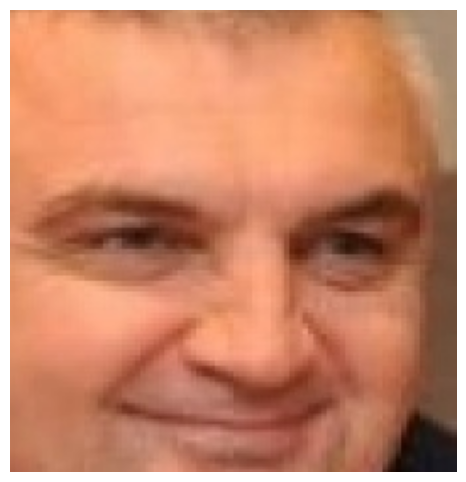

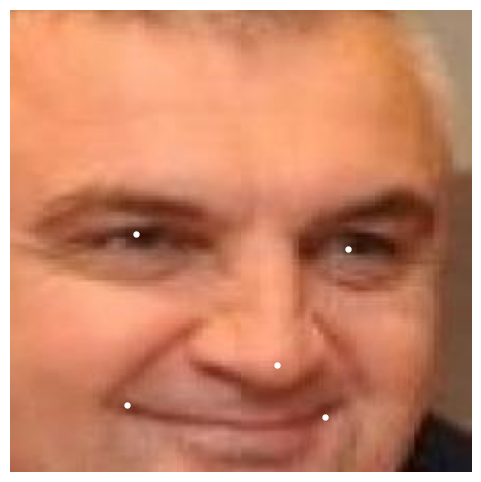

In [553]:
show_points(image_path, '000002', '0.jpg', coords_df)
coords = crop_resize_face(image_path, '000002', '0.jpg', coords_df, project_path, show = True)

img = Image.open(os.path.join(project_path, '0.jpg'))
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords[::2], coords[1::2], s = 50, marker ='.', c='w')
plt.axis('off');

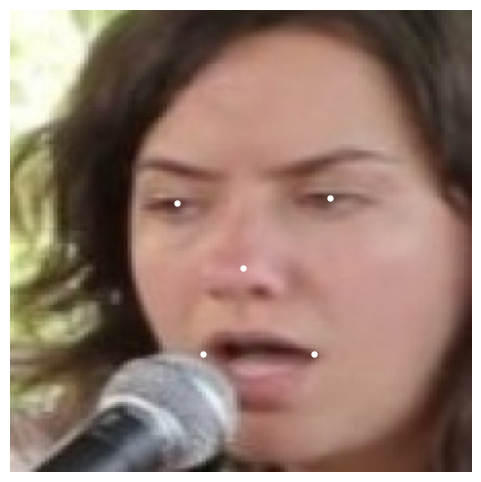

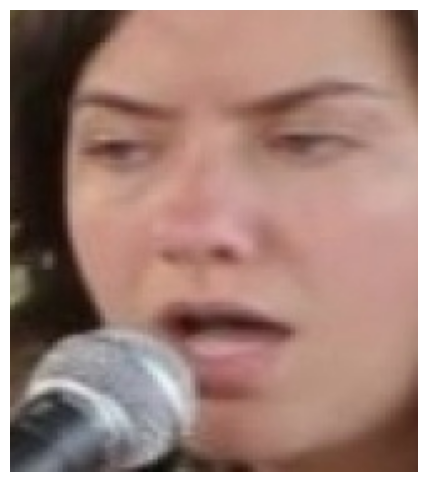

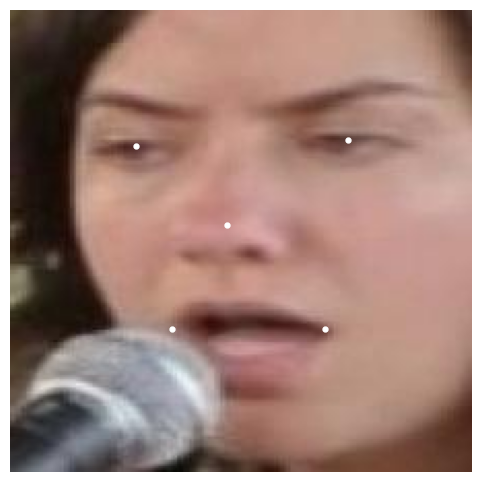

In [555]:
show_points(image_path, '000003', '0.jpg', coords_df)
coords = crop_resize_face(image_path, '000003', '0.jpg', coords_df, project_path, show = True)

img = Image.open(os.path.join(project_path, '0.jpg'))
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords[::2], coords[1::2], s = 50, marker ='.', c='w')
plt.axis('off');

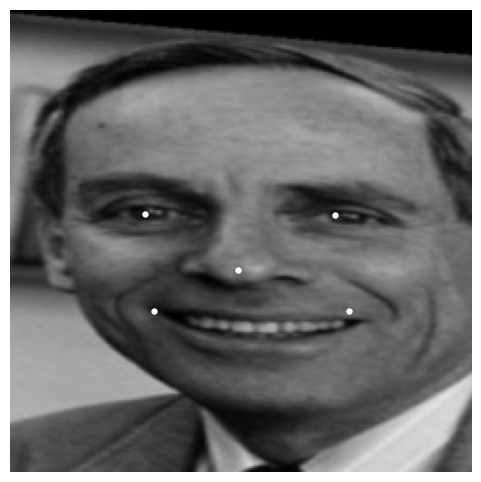

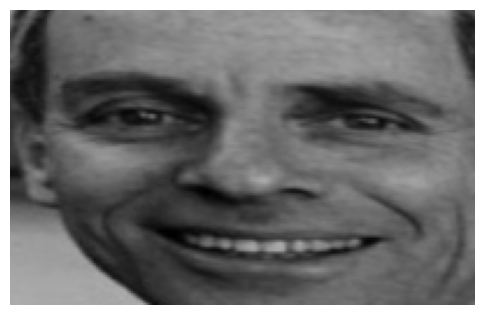

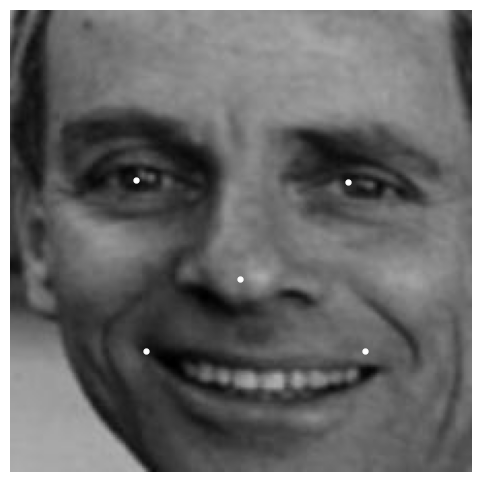

In [559]:
show_points(image_path, '000004', '0.jpg', coords_df)
coords = crop_resize_face(image_path, '000004', '0.jpg', coords_df, project_path, show = True)

img = Image.open(os.path.join(project_path, '0.jpg'))
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords[::2], coords[1::2], s = 50, marker ='.', c='w')
plt.axis('off');

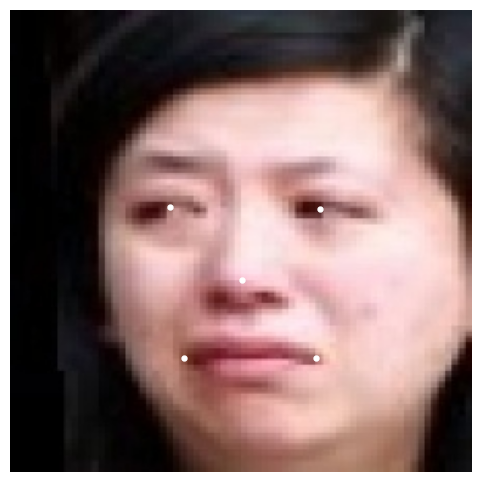

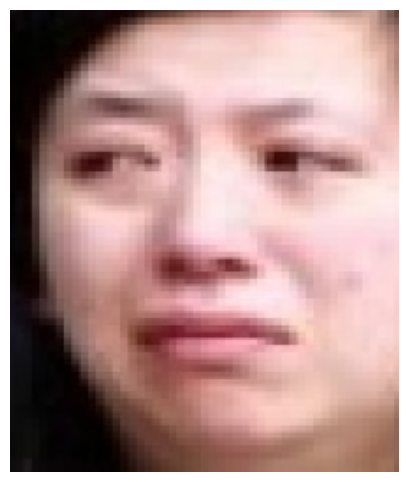

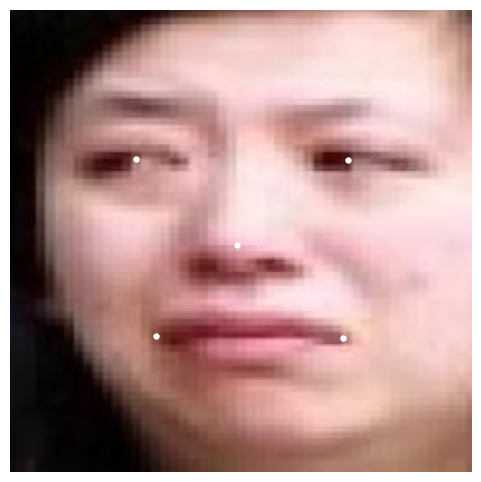

In [561]:
show_points(image_path, '000005', '0.jpg', coords_df)
coords = crop_resize_face(image_path, '000005', '0.jpg', coords_df, project_path, show = True)

img = Image.open(os.path.join(project_path, '0.jpg'))
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords[::2], coords[1::2], s = 50, marker ='.', c='w')
plt.axis('off');

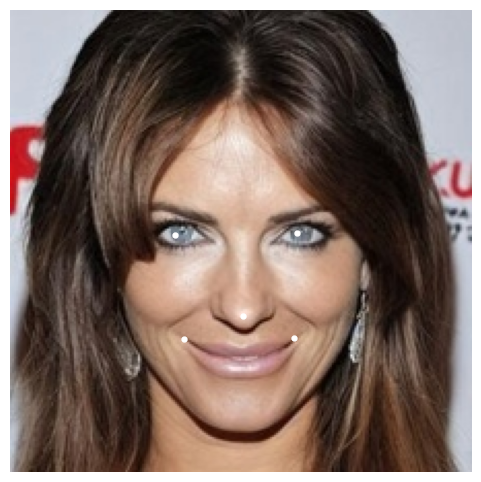

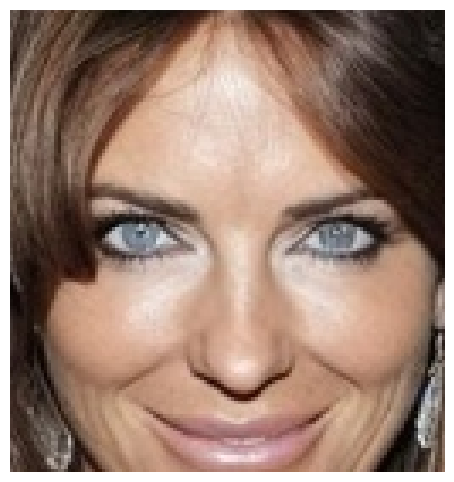

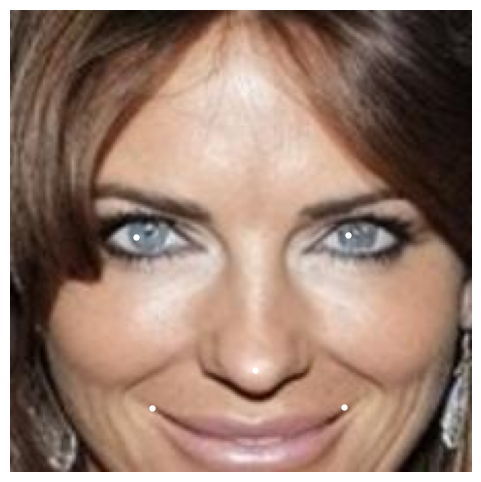

In [563]:
show_points(image_path, '000006', '6.jpg', coords_df)
coords = crop_resize_face(image_path, '000006', '6.jpg', coords_df, project_path, show = True)

img = Image.open(os.path.join(project_path, '6.jpg'))
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords[::2], coords[1::2], s = 50, marker ='.', c='w')
plt.axis('off');

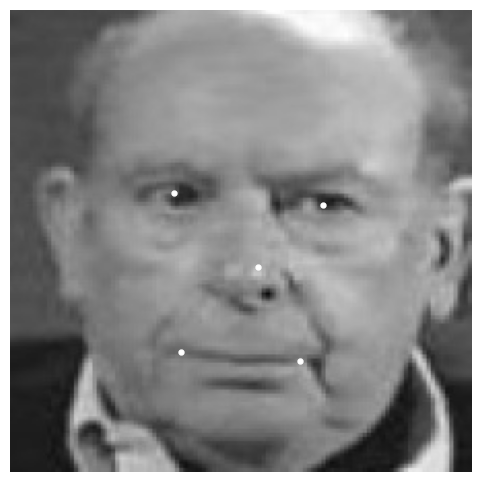

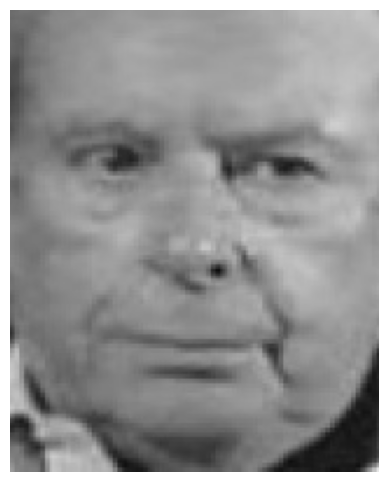

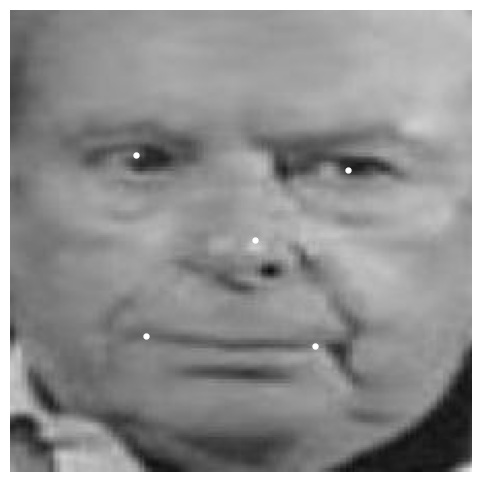

In [565]:
show_points(image_path, '000007', '7.jpg', coords_df)
coords = crop_resize_face(image_path, '000007', '7.jpg', coords_df, project_path, show = True)

img = Image.open(os.path.join(project_path, '7.jpg'))
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords[::2], coords[1::2], s = 50, marker ='.', c='w')
plt.axis('off');

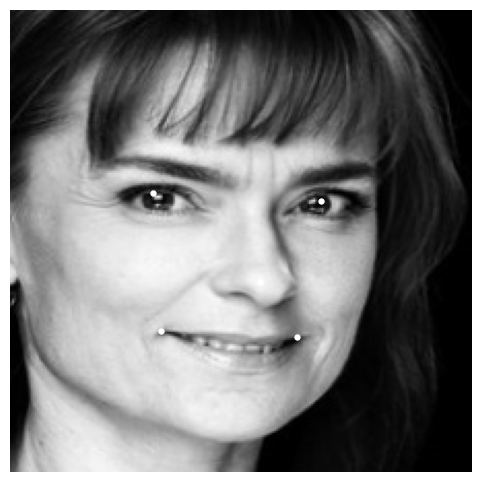

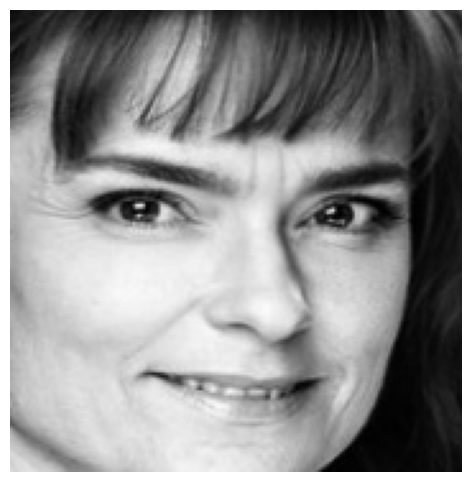

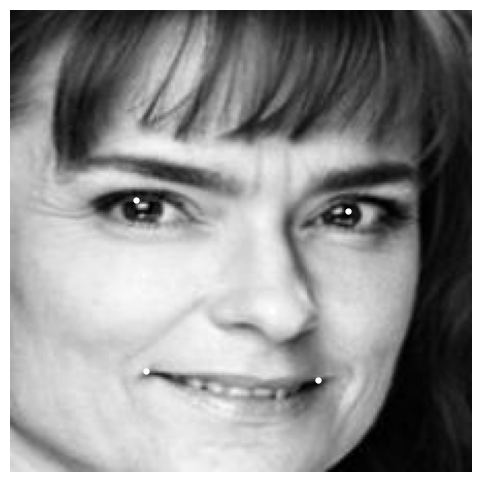

In [567]:
show_points(image_path, '000008', '8.jpg', coords_df)
coords = crop_resize_face(image_path, '000008', '8.jpg', coords_df, project_path, show = True)

img = Image.open(os.path.join(project_path, '8.jpg'))
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.scatter(coords[::2], coords[1::2], s = 50, marker ='.', c='w')
plt.axis('off');